In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import re
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
import datetime


# Genre Dataset

## Import files

In [2]:
awards = pd.read_csv('./awards.csv')#, sep = ',', header = 0, names = ['eventId', 'eventName', 'awardName', 'year','occurence', 'winAnnouncementTime', 'categoryName', 'nomeneeNote', 'name'])
awards = awards.dropna(subset = ['eventName', 'awardName','isPrimary', 'isWinner', 'isTitle','isCompany', 'const'])

C:\Users\gonxh\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
movies = pd.read_csv('./IMDb_movies.csv')#, sep = ',', header = 0, names = ['eventId', 'eventName', 'awardName', 'year','occurence', 'winAnnouncementTime', 'categoryName', 'nomeneeNote', 'name'])
movies = movies.dropna(subset = ['imdb_title_id', 'title','year', 'genre'])

### Join Datasets based on the id_movies:

In [4]:
id_movies_awards = awards['const']
id_movies = movies['imdb_title_id']

intersection_ids = list(set(id_movies_awards).intersection(id_movies))

### Get unique genres of movies

In [5]:
movie_genres = movies['genre'].unique()
movie_genres = [x.title().strip() for row in movie_genres for x in row.split(',')]
movie_genres = list(set(movie_genres))
movie_genres

['Family',
 'Biography',
 'Game-Show',
 'Comedy',
 'Music',
 'Crime',
 'Documentary',
 'Romance',
 'History',
 'Sci-Fi',
 'Action',
 'Adult',
 'Sport',
 'Thriller',
 'Animation',
 'Musical',
 'Film-Noir',
 'Drama',
 'Reality-Tv',
 'Western',
 'Mystery',
 'Fantasy',
 'News',
 'Adventure',
 'Horror',
 'War']

### Merge datasets to create a genre/awards dataset

In [6]:
movies['genre'] = movies['genre'].apply(lambda x : x.split(', '))


In [7]:
items_as_cols = movies.apply(lambda x: pd.Series(x['genre']), axis=1)
# Keep original df index as a column so it's retained after melt
items_as_cols['orig_index'] = items_as_cols.index

melted_items = pd.melt(items_as_cols, id_vars='orig_index', 
                       var_name='genre_num', value_name='genre')
melted_items.set_index('orig_index', inplace=True)

movies = movies.merge(melted_items, left_index=True, right_index=True)

In [8]:
keys = list(movies.columns.values)

In [9]:
movies = movies.drop(columns = [
 'date_published',
 'duration',
 'language',
 'director',
 'writer',
 'production_company',
 'actors',
 'description',
 'avg_vote',
 'votes',
 'budget',
 'usa_gross_income',
 'worlwide_gross_income',
 'metascore',
 'reviews_from_users',
 'reviews_from_critics',
 'genre_num',
 'genre_x'])

In [10]:
awards_keys = list(awards.columns.values)

In [11]:
awards = awards.drop(columns = ['occurrence',
 'winAnnouncementTime',
 'categoryName',
 'nomeneeNote',
 'originalName',
 'songNames',
 'episodeNames',
 'characterNames',
 'isWinner',
 'isPrimary',
 'isSecondary',
 'isPerson',
 'isTitle',
 'isCompany',
 'notes'])

In [12]:
awards.rename(columns={'const':'imdb_title_id'}, inplace=True)

Here we now have only the movies which are also in awards

In [13]:
movies = movies[movies['imdb_title_id'].isin(intersection_ids)]

In [14]:
new = pd.merge(movies, awards, on=['imdb_title_id'])
new = new.dropna(subset = ['imdb_title_id','title','genre_y','eventId'])
new = new.drop(columns=['name','original_title','year_x'])
new

,imdb_title_id,title,country,genre_y,eventId,eventName,awardName,year_y
0,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...",USA,Biography,ev0000468,"National Film Preservation Board, USA",National Film Registry,1998
1,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...",USA,Drama,ev0000468,"National Film Preservation Board, USA",National Film Registry,1998
3,tt0002844,Fantômas - À l'ombre de la guillotine,France,Crime,ev0000004,"Academy of Science Fiction, Fantasy & Horror F...",Saturn Award,2011
4,tt0002844,Fantômas - À l'ombre de la guillotine,France,Drama,ev0000004,"Academy of Science Fiction, Fantasy & Horror F...",Saturn Award,2011
6,tt0003037,Juve contre Fantômas,France,Crime,ev0000004,"Academy of Science Fiction, Fantasy & Horror F...",Saturn Award,2011
7,tt0003037,Juve contre Fantômas,France,Drama,ev0000004,"Academy of Science Fiction, Fantasy & Horror F...",Saturn Award,2011
9,tt0003165,Le mort qui tue,France,Crime,ev0000004,"Academy of Science Fiction, Fantasy & Horror F...",Saturn Award,2011
10,tt0003165,Le mort qui tue,France,Drama,ev0000004,"Academy of Science Fiction, Fantasy & Horror F...",Saturn Award,2011
11,tt0003165,Le mort qui tue,France,Mystery,ev0000004,"Academy of Science Fiction, Fantasy & Horror F...",Saturn Award,2011
12,tt0003471,Traffic in Souls,USA,Crime,ev0000468,"National Film Preservation Board, USA",National Film Registry,2006


### Find most famous genre per event

In [15]:
movie_genre_by_event = new.groupby(['eventName','genre_y']).size().to_frame('count').reset_index().rename(columns={'count':'numMovies'})

In [16]:
movie_genre_by_event

,eventName,genre_y,numMovies
0,100 Hour Film Race,Drama,1
1,12 Months Film Festival,Drama,3
2,12 Months Film Festival,Horror,2
3,12 Months Film Festival,Mystery,2
4,12 Months Film Festival,Thriller,1
5,13 Horror,Horror,4
6,13 Horror,Sci-Fi,1
7,13 Horror,Thriller,3
8,"168 Film Festival, US",Biography,1
9,"168 Film Festival, US",Drama,3


In [17]:
most_famous_awards = ['Primetime Emmy Awards',
 'Grammy Awards',
 'Online Film & Television Association',
 'BAFTA Awards',
 'Academy Awards, USA',
 'Daytime Emmy Awards',
 'Adult Video News Awards',
 'Young Artist Awards',
 'Academy of Science Fiction, Fantasy & Horror Films, USA',
 'Satellite Awards',
 'Cannes Film Festival',
 'Berlin International Film Festival',
 'Teen Choice Awards',
 'Leo Awards',
 'Venice Film Festival',
 'Gold Derby Awards',
 'Gemini Awards',
 'Italian National Syndicate of Film Journalists',
 'Image Awards (NAACP)',
 'Chicago International Film Festival']

In [18]:
count_awards = new.groupby(['eventName']).size().to_frame('count').reset_index().rename(columns={'count':'numMovies'})
count_awards = count_awards.sort_values(by=['numMovies'], ascending = False)
count_awards

,eventName,numMovies
44,"Academy Awards, USA",20898
46,"Academy of Science Fiction, Fantasy & Horror F...",13544
262,BAFTA Awards,12489
2227,Online Film & Television Association,10519
2627,Satellite Awards,8929
1062,Filmfare Awards,8147
1258,Golden Trailer Awards,8090
751,"César Awards, France",7647
1254,Golden Schmoes Awards,7213
253,Awards Circuit Community Awards,7211


In [19]:
movie_genre_by_event = movie_genre_by_event[movie_genre_by_event['eventName'].isin(most_famous_awards)]

In [20]:
movie_genre_by_event

,eventName,genre_y,numMovies
387,"Academy Awards, USA",Action,783
388,"Academy Awards, USA",Adventure,1331
389,"Academy Awards, USA",Animation,224
390,"Academy Awards, USA",Biography,1339
391,"Academy Awards, USA",Comedy,2092
392,"Academy Awards, USA",Crime,914
393,"Academy Awards, USA",Drama,6566
394,"Academy Awards, USA",Family,443
395,"Academy Awards, USA",Fantasy,486
396,"Academy Awards, USA",Film-Noir,203


Choose top 3 genre per event

In [21]:
top_3_df = movie_genre_by_event.set_index('genre_y').groupby("eventName")['numMovies'].nlargest(3).reset_index()
list(top_3_df[top_3_df['eventName']=='Academy Awards, USA']['genre_y'])

['Drama', 'Romance', 'Comedy']

In [22]:
genres_names = list(top_3_df['genre_y'].unique())

## Plot Genres and Top 3 Genres per most famous event

In [23]:
plott = new[new['eventName'].isin(most_famous_awards)]
plott

,imdb_title_id,title,country,genre_y,eventId,eventName,awardName,year_y
3,tt0002844,Fantômas - À l'ombre de la guillotine,France,Crime,ev0000004,"Academy of Science Fiction, Fantasy & Horror F...",Saturn Award,2011
4,tt0002844,Fantômas - À l'ombre de la guillotine,France,Drama,ev0000004,"Academy of Science Fiction, Fantasy & Horror F...",Saturn Award,2011
6,tt0003037,Juve contre Fantômas,France,Crime,ev0000004,"Academy of Science Fiction, Fantasy & Horror F...",Saturn Award,2011
7,tt0003037,Juve contre Fantômas,France,Drama,ev0000004,"Academy of Science Fiction, Fantasy & Horror F...",Saturn Award,2011
9,tt0003165,Le mort qui tue,France,Crime,ev0000004,"Academy of Science Fiction, Fantasy & Horror F...",Saturn Award,2011
10,tt0003165,Le mort qui tue,France,Drama,ev0000004,"Academy of Science Fiction, Fantasy & Horror F...",Saturn Award,2011
11,tt0003165,Le mort qui tue,France,Mystery,ev0000004,"Academy of Science Fiction, Fantasy & Horror F...",Saturn Award,2011
18,tt0003930,Fantômas contre Fantômas,France,Crime,ev0000004,"Academy of Science Fiction, Fantasy & Horror F...",Saturn Award,2011
19,tt0003930,Fantômas contre Fantômas,France,Drama,ev0000004,"Academy of Science Fiction, Fantasy & Horror F...",Saturn Award,2011
21,tt0003952,Le faux magistrat,France,Crime,ev0000004,"Academy of Science Fiction, Fantasy & Horror F...",Saturn Award,2011


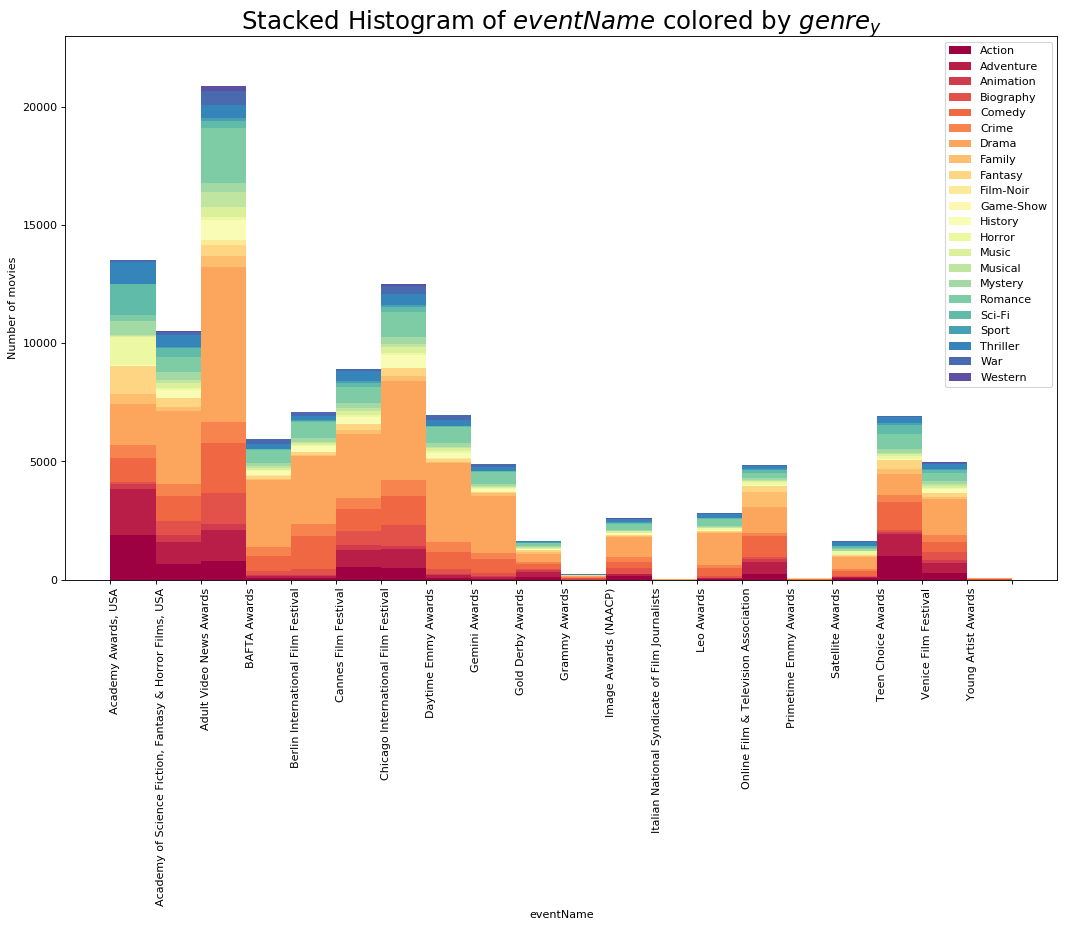

In [24]:
# Prepare data
x_var = 'eventName'
groupby_var = 'genre_y'
df = plott
df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df[x_var].values.tolist() for i, df in df_agg]

# Draw
plt.figure(figsize=(16,9), dpi= 80)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, df[x_var].unique().__len__(), stacked=True, density=False, color=colors[:len(vals)])

# Decoration
plt.legend({group:col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])})
plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$", fontsize=22)
plt.xlabel(x_var)
plt.ylabel("Number of movies")
plt.ylim(0, 23000)
plt.xticks(ticks=bins, labels=np.unique(df[x_var]).tolist(), rotation=90, horizontalalignment='left')
plt.show()

In [25]:
plott_2 = new[new['eventName'].isin(most_famous_awards)]
plott_2

,imdb_title_id,title,country,genre_y,eventId,eventName,awardName,year_y
3,tt0002844,Fantômas - À l'ombre de la guillotine,France,Crime,ev0000004,"Academy of Science Fiction, Fantasy & Horror F...",Saturn Award,2011
4,tt0002844,Fantômas - À l'ombre de la guillotine,France,Drama,ev0000004,"Academy of Science Fiction, Fantasy & Horror F...",Saturn Award,2011
6,tt0003037,Juve contre Fantômas,France,Crime,ev0000004,"Academy of Science Fiction, Fantasy & Horror F...",Saturn Award,2011
7,tt0003037,Juve contre Fantômas,France,Drama,ev0000004,"Academy of Science Fiction, Fantasy & Horror F...",Saturn Award,2011
9,tt0003165,Le mort qui tue,France,Crime,ev0000004,"Academy of Science Fiction, Fantasy & Horror F...",Saturn Award,2011
10,tt0003165,Le mort qui tue,France,Drama,ev0000004,"Academy of Science Fiction, Fantasy & Horror F...",Saturn Award,2011
11,tt0003165,Le mort qui tue,France,Mystery,ev0000004,"Academy of Science Fiction, Fantasy & Horror F...",Saturn Award,2011
18,tt0003930,Fantômas contre Fantômas,France,Crime,ev0000004,"Academy of Science Fiction, Fantasy & Horror F...",Saturn Award,2011
19,tt0003930,Fantômas contre Fantômas,France,Drama,ev0000004,"Academy of Science Fiction, Fantasy & Horror F...",Saturn Award,2011
21,tt0003952,Le faux magistrat,France,Crime,ev0000004,"Academy of Science Fiction, Fantasy & Horror F...",Saturn Award,2011


In [26]:
for event in most_famous_awards:
    genre_per_event = list(top_3_df[top_3_df['eventName']==event]['genre_y'])
    genre_not_in_event = list(set(movie_genres) - set(genre_per_event))
    for genre in genre_not_in_event:
        plott_2 = plott_2.drop(plott_2[(plott_2.eventName==event) & (plott_2.genre_y==genre)].index)

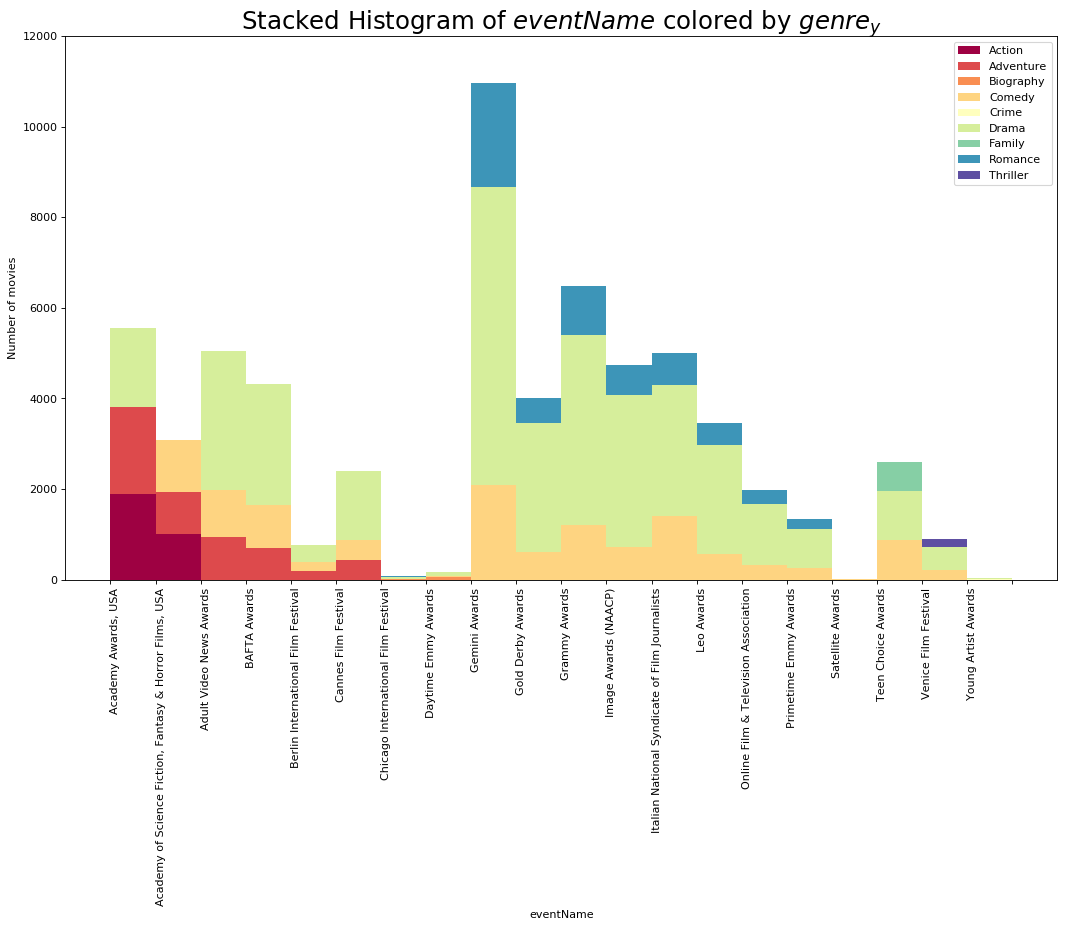

In [27]:
# Prepare data
x_var = 'eventName'
groupby_var = 'genre_y'
df = plott_2
df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df[x_var].values.tolist() for i, df in df_agg]

# Draw
plt.figure(figsize=(16,9), dpi= 80)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, df[x_var].unique().__len__(), stacked=True, density=False, color=colors[:len(vals)])

# Decoration
plt.legend({group:col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])})
plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$", fontsize=22)
plt.xlabel(x_var)
plt.ylabel("Number of movies")
plt.ylim(0, 12000)
plt.xticks(ticks=bins, labels=np.unique(df[x_var]).tolist(), rotation=90, horizontalalignment='left')
plt.show()

## Timeline of top_genres for one specific event

In [28]:
new_2 = new.copy()
new_2['count'] = new_2.groupby(['eventName','genre_y','year_y'])['genre_y'].transform('count')
new_2

,imdb_title_id,title,country,genre_y,eventId,eventName,awardName,year_y,count
0,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...",USA,Biography,ev0000468,"National Film Preservation Board, USA",National Film Registry,1998,1
1,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...",USA,Drama,ev0000468,"National Film Preservation Board, USA",National Film Registry,1998,12
3,tt0002844,Fantômas - À l'ombre de la guillotine,France,Crime,ev0000004,"Academy of Science Fiction, Fantasy & Horror F...",Saturn Award,2011,30
4,tt0002844,Fantômas - À l'ombre de la guillotine,France,Drama,ev0000004,"Academy of Science Fiction, Fantasy & Horror F...",Saturn Award,2011,66
6,tt0003037,Juve contre Fantômas,France,Crime,ev0000004,"Academy of Science Fiction, Fantasy & Horror F...",Saturn Award,2011,30
7,tt0003037,Juve contre Fantômas,France,Drama,ev0000004,"Academy of Science Fiction, Fantasy & Horror F...",Saturn Award,2011,66
9,tt0003165,Le mort qui tue,France,Crime,ev0000004,"Academy of Science Fiction, Fantasy & Horror F...",Saturn Award,2011,30
10,tt0003165,Le mort qui tue,France,Drama,ev0000004,"Academy of Science Fiction, Fantasy & Horror F...",Saturn Award,2011,66
11,tt0003165,Le mort qui tue,France,Mystery,ev0000004,"Academy of Science Fiction, Fantasy & Horror F...",Saturn Award,2011,18
12,tt0003471,Traffic in Souls,USA,Crime,ev0000468,"National Film Preservation Board, USA",National Film Registry,2006,3


In [29]:
idx = new_2.groupby(['eventName', 'year_y'])['count'].transform(max) == new_2['count']
new_2[idx]

,imdb_title_id,title,country,genre_y,eventId,eventName,awardName,year_y,count
1,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...",USA,Drama,ev0000468,"National Film Preservation Board, USA",National Film Registry,1998,12
4,tt0002844,Fantômas - À l'ombre de la guillotine,France,Drama,ev0000004,"Academy of Science Fiction, Fantasy & Horror F...",Saturn Award,2011,66
7,tt0003037,Juve contre Fantômas,France,Drama,ev0000004,"Academy of Science Fiction, Fantasy & Horror F...",Saturn Award,2011,66
10,tt0003165,Le mort qui tue,France,Drama,ev0000004,"Academy of Science Fiction, Fantasy & Horror F...",Saturn Award,2011,66
13,tt0003471,Traffic in Souls,USA,Drama,ev0000468,"National Film Preservation Board, USA",National Film Registry,2006,11
19,tt0003930,Fantômas contre Fantômas,France,Drama,ev0000004,"Academy of Science Fiction, Fantasy & Horror F...",Saturn Award,2011,66
22,tt0003952,Le faux magistrat,France,Drama,ev0000004,"Academy of Science Fiction, Fantasy & Horror F...",Saturn Award,2011,66
24,tt0004150,In the Land of the Head Hunters,USA,Drama,ev0000468,"National Film Preservation Board, USA",National Film Registry,1999,11
29,tt0004465,The Perils of Pauline,USA,Drama,ev0000468,"National Film Preservation Board, USA",National Film Registry,2008,11
30,tt0004681,Tess of the Storm Country,USA,Drama,ev0000468,"National Film Preservation Board, USA",National Film Registry,2006,11


In [70]:
timeline = new_2[new_2['eventName'] == 'Academy Awards, USA']
timeline = timeline.drop(columns=['imdb_title_id','title','eventId', 'awardName', 'country'])
timeline = timeline.drop_duplicates()
timeline

valu = 3
idx2 = list(timeline.groupby(['year_y'])['count'].nlargest(valu).reset_index()['level_1'])
timeline = timeline.loc[idx2,:]
timeline

,genre_y,eventName,year_y,count
430,Drama,"Academy Awards, USA",1929,26
469,Romance,"Academy Awards, USA",1929,19
526,Comedy,"Academy Awards, USA",1929,3
624,Drama,"Academy Awards, USA",1930,54
772,Romance,"Academy Awards, USA",1930,33
828,Musical,"Academy Awards, USA",1930,14
1045,Drama,"Academy Awards, USA",1931,31
1075,Comedy,"Academy Awards, USA",1931,14
1095,Romance,"Academy Awards, USA",1931,13
1179,Drama,"Academy Awards, USA",1932,24


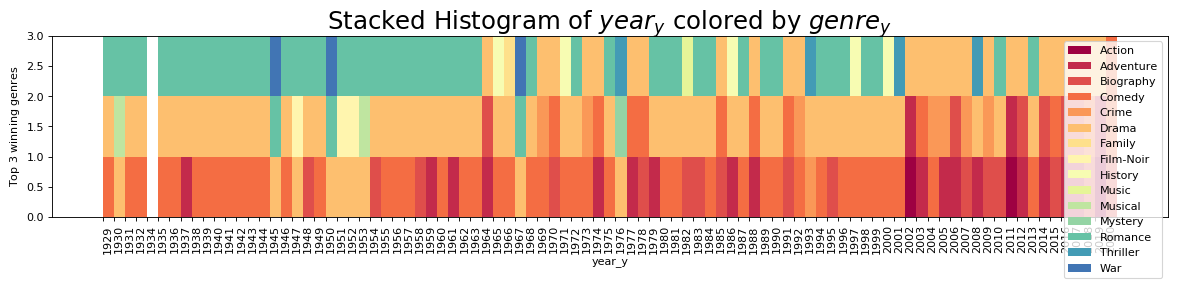

In [71]:
# Prepare data
x_var = 'year_y'
groupby_var = 'genre_y'
df = timeline
df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df[x_var].values.tolist() for i, df in df_agg]

# Draw
plt.figure(figsize=(18,3), dpi= 80)
colors = [plt.cm.Spectral(i/float(len(vals))) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, df[x_var].unique().__len__(), stacked=True, density=False, color=colors[:len(vals)])

# Decoration
plt.legend({group:col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])})
plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$", fontsize=22)
plt.xlabel(x_var)
plt.ylabel(f"Top ${valu}$ winning genres")
plt.ylim(0, valu)
plt.xticks(ticks=bins, labels=np.unique(df[x_var]).tolist(), rotation=90, horizontalalignment='left')
plt.show()